## **Define Simple Agent State**

In [56]:
AgentState = {}
AgentState

{}

In [57]:
AgentState["messages"] = []

In [58]:
AgentState

{'messages': []}

In [59]:
AgentState["messages"].append("I'm Al amin")
AgentState

{'messages': ["I'm Al amin"]}

In [60]:
AgentState["messages"].append("Nice to meet you!")

In [61]:
AgentState

{'messages': ["I'm Al amin", 'Nice to meet you!']}

## AgentState

In [62]:
from typing import TypedDict, Sequence, Annotated
from langchain_core.messages import BaseMessage
import operator

class AgentState(TypedDict):
    """This is is my graph state where store all conversations."""
    messages: Annotated[Sequence[BaseMessage], operator.add]

## Define Node

In [63]:
def node_1(state: AgentState):
    print("---Node 1---")
    
    question = state["messages"][-1]
    
    return {
        "messages": [question + "This if from node 1"]
    }
    
    

In [64]:
def node_2(state: AgentState):
    print("--Node 2--")
    
    question = state["messages"][0]
    
    return {
        "messages": [question + "This if from node 2"]
    }
    

In [65]:
def node_3(state: AgentState):
    print("--Node 3--")
    question = state["messages"][0]
    
    return {
        "messages": [question + "This if from node 3"]
    }

In [66]:
import random

def router(state: AgentState):
    print("---Router---")
    
    number = random.random()
    
    if number > 0.5:
        return "RAG_CALL"
    else:
        return "LLM_CALL"
    
    
    

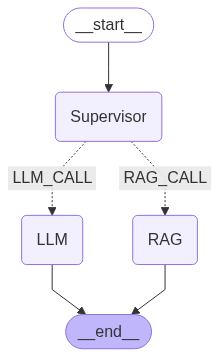

In [67]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

workflow = StateGraph(AgentState)

workflow.add_node("Supervisor", node_1)
workflow.add_node("RAG", node_2)
workflow.add_node("LLM", node_3)

workflow.add_edge(START, "Supervisor")
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG_CALL": "RAG",
        "LLM_CALL": "LLM"
    }
)
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
graph.invoke(
    {
        "messages": ["hello, how are you!!"]
    }
)

---Node 1---
---Router---
--Node 2--


{'messages': ['hello, how are you!!',
  'hello, how are you!!This if from node 1',
  'hello, how are you!!This if from node 2']}